# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Luffi Idris Setiawan
- **Email:** lupiajaa1@gmail.com
- **ID Dicoding:** luffi_idris_setiawan

## Menentukan Pertanyaan Bisnis

- Kategori produk mana yang paling banyak dibeli oleh pelanggan dan memberikan revenue tertinggi?
- Bagaimana tren penjualan produk setiap kuartal dan apakah ada pola musiman (seasonality)?
- Dari kota mana saja pelanggan terbanyak berasal dan bagaimana distribusinya berdasarkan frekuensi pembelian?
- Bagaimana tren pertumbuhan pelanggan baru setiap bulan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Pada proyek ini, saya menggunakan ***E-Commerce Public Dataset*** yang disediakan oleh dicoding. Untuk menjawab pertanyaan bisnis yang telah saya buat sebelumnya, pertama-tama saya perlu menggunakan memuat file dan memahami schema serta isi dari dataset itu terlebih dahulu untuk menentukan dataset apa yang tepat untuk digunakan

![Data schema](https://i.imgur.com/HRhd2Y0.png)

In [2]:
# Import Data Pelanggan
customers_df = pd.read_csv("E-Commerce_Public_Dataset/customers_dataset.csv")

# Import Data Geolocation
geolocation_data_df = pd.read_csv("E-Commerce_Public_Dataset/geolocation_dataset.csv")

# Import Data Order 
order_items_df = pd.read_csv("E-Commerce_Public_Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("E-Commerce_Public_Dataset/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("E-Commerce_Public_Dataset/order_reviews_dataset.csv")
orders_df = pd.read_csv("E-Commerce_Public_Dataset/orders_dataset.csv")

# Import Data Kategori Produk
products_category_df = pd.read_csv("E-Commerce_Public_Dataset/products_dataset.csv")
products_category_name_translation_df = pd.read_csv("E-Commerce_Public_Dataset/product_category_name_translation.csv")

# Import Data Penjual
sellers_df = pd.read_csv("E-Commerce_Public_Dataset/sellers_dataset.csv")

In [3]:
# Memuat Data Pelanggan
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Memuat Data Geolocation
geolocation_data_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# Memuat Data Order Items
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Memuat Data Order Payments
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# Memuat Data Order Reviews
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
# Memuat Data Order
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# Memuat Data Kategori Produk
products_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
# Memuat Data Kategori Produk yang sudah diterjemahkan ke bahasa inggris
products_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Agar memudahkan proses analisis dan visualisasi, saya akan membuat variabel baru kategori produk dan melakukan merge ***Inner Join*** pada nama kategori produk

In [11]:
# Menggabungkan tabel yang berisi translasi nama kategori produk ke bahasa inggris
new_products_category_df = pd.merge(
    left=products_category_df,
    right=products_category_name_translation_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

new_products_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [12]:
# Memuat Data Penjual
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- **Tabel customers_dataset** menyimpan informasi customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state
- **Tabel geolocation_dataset** menyimpan informasi geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, dan geolocation_state
- **Tabel order_items_dataset** menyimpan informasi order_id, order_item_id, product_id, seller_id, shipping_limit_date	price, dan freight_value
- **Tabel order_payments_dataset** menyimpan informasi order_id, payment_sequential, payment_type, payment_installments, dan payment_value
- **Tabel order_reviews_dataset** menyimpan informasi review_id	order_id, review_score, review_comment_title, review_comment_message, review_creation_date, dan review_answer_timestamp
- **Tabel orders_dataset** menyimpan informasi order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
- **Tabel new_products_category_df** menyimpan informasi yang ***merupakan merge (penggabungan) "Inner Join" dari tabel product_category_name_translation dengan tabel products_dataset***, yaitu product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, dan product_category_name_english
- **Tabel sellers_dataset** menyimpan informasi seller_id, seller_zip_code_prefix, seller_city, dan seller_state

### Assessing Data

Setelah mengamati masing-masing tabel, saya hanya menggunakan tabel yang relevan berdasarkan pertanyaan bisnis yang saya buat sebelumnya dari sekarang hingga seterusnya

#### Identifikasi Tabel Customer

In [13]:
# Menampilkan informasi tabel
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
# Menampilkan jumlah duplikasi
print("Jumlah duplikasi : ", customers_df.duplicated().sum())

Jumlah duplikasi :  0


Dari pemeriksaan informasi, tidak ditemukan masalah dan tidak ada missing value pada tabel. Saya tidak akan melakukan pemeriksaan parameter statistik menggunakan `.describe()` karena kode pos (zip code) bukan data numerik yang membutuhkan analisis statistik.

**Insight:**
- Dari pemeriksaan informasi, tidak ditemukan masalah dan tidak ada missing value pada tabel.
- Tabel tidak memiliki data yang duplikat

#### Identifikasi Tabel Geolocation

In [15]:
# Menampilkan informasi tabel
geolocation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
# Menampilkan jumlah duplikasi
print("Jumlah duplikasi : ", geolocation_data_df.duplicated().sum())

Jumlah duplikasi :  261831


**Insight:**
- Tabel Geolocation tidak memiliki masalah dan tidak ada missing value pada tabel.
- Tabel memiliki data yang duplikat sebanyak 261.831 baris karena zip code berupa prefix atau hanya 5 digit, namun tidak dilakukan tindakan apapun untuk kebutuhan analisis nantinya

#### Identifikasi Tabel Order Items

In [17]:
# Menampilkan informasi tabel
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Tidak ada missing value, tetapi permasalahan yang saya temukan disini adalah kolom **shipping_limit_date** yang bertipe object seharusnya bertipe data datetime. Selanjutnya saya akan melakukan pemeriksaan kolom numerik pada tabel dengan parameter statistik menggunakan `.describe()`

In [18]:
# Menampilkan parameter statistik kolom numerik tabel
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


order_item_id sebanyak 21 membuat saya curga bahwa ini *innacurate value*. Saya akan memeriksanya lebih dalam

In [19]:
# Mencari informasi yang memiliki order_item_id sebanyak 21
order_items_df[order_items_df["order_item_id"] == 21]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57


In [20]:
# Pemeriksaan terhadap order_id yang memiliki order_item_id 21
order_items_df[order_items_df["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


Ternyata order_item_id dengan total 21 ini valid dan akurat karena pelanggan mungkin pembelian dilakukan dengan cara grosir pada product_id **270516a3f41dc035aa87d220228f844c** dan **05b515fdc76e888aada3c6d66c201dff**

In [21]:
# Menampilkan jumlah duplikasi
print("Jumlah duplikasi : ", order_items_df.duplicated().sum())

Jumlah duplikasi :  0


**Insight:**
- Tabel order items terdapat masalah dimana kolom **shipping_limit_date** yang bertipe object seharusnya bertipe data datetime
- Tabel tidak memiliki duplikat maupun missing value

#### Identifikasi Tabel Orders

In [22]:
# Menampilkan informasi tabel
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
# Menampilkan jumlah missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing values pada kolom **order_approved_at** sebanyak 160, **order_delivered_customer_date** sebanyak 1783, dan **order_delivered_customer_date** sebanyak 2965. Saya akan memeriksanya lebih dalam setelah ini.

Selain itu kolom **order_purchase_timestamp, Kolom order_approved_at, order_delivered_customer_date, dan order_delivered_customer_date** memiliki tipe data yang salah, seharusnya mereka menggunakan tipe data datetime

In [24]:
# Melihat jenis status
orders_df["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [25]:
# Pemeriksaan missing values pada status delivered
orders_df[orders_df["order_status"] == "delivered"].isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [26]:
# Pemeriksaan missing values pada status invoiced
orders_df[orders_df["order_status"] == "invoiced"].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

In [27]:
# Pemeriksaan missing values pada status shipped
orders_df[orders_df["order_status"] == "shipped"].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64

In [28]:
# Pemeriksaan missing values pada status processing
orders_df[orders_df["order_status"] == "processing"].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

In [29]:
# Pemeriksaan missing values pada status unavailable
orders_df[orders_df["order_status"] == "unavailable"].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

In [30]:
# Pemeriksaan missing values pada status canceled
orders_df[orders_df["order_status"] == "canceled"].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

In [31]:
# Pemeriksaan missing values pada status created
orders_df[orders_df["order_status"] == "created"].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
dtype: int64

In [32]:
# Pemeriksaan missing values pada status approved
orders_df[orders_df["order_status"] == "approved"].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    2
order_estimated_delivery_date    0
dtype: int64

Hasil analisis menunjukkan bahwa jumlah missing values sangat bervariasi tergantung status order:

- **created & approved**: Wajar ada missing karena order masih dalam tahap awal.
- **processing**: Banyak order belum dikirim saat data diambil.
- **unavailable & canceled**: Missing values wajar karena order dibatalkan.
- **delivered**: Ada beberapa order berstatus delivered tetapi tidak memiliki informasi lengkap. Ini akan ditandai sebagai anomali.
- **invoiced & shipped**: Banyak order belum memiliki informasi lengkap tentang pengiriman ke pelanggan, terutama di status shipped.

In [33]:
# Menampilkan jumlah duplikasi
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


**Insight:**
- Terdapat missing values pada kolom **order_approved_at** sebanyak 160, **order_delivered_customer_date** sebanyak 1783, dan **order_delivered_customer_date** sebanyak 2965 berdasarkan variasi status order.
- Kolom **order_purchase_timestamp, Kolom order_approved_at, order_delivered_customer_date, dan order_delivered_customer_date** seharusnya dipresentasikan dalam bentuk datetime, bukan object
- Tabel tidak memiliki data yang duplikasi

#### Identifikasi Product Category

In [34]:
# Menampilkan informasi tabel
new_products_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32328 non-null  object 
 1   product_category_name          32328 non-null  object 
 2   product_name_lenght            32328 non-null  float64
 3   product_description_lenght     32328 non-null  float64
 4   product_photos_qty             32328 non-null  float64
 5   product_weight_g               32327 non-null  float64
 6   product_length_cm              32327 non-null  float64
 7   product_height_cm              32327 non-null  float64
 8   product_width_cm               32327 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [35]:
# Menampilkan jumlah missing value
new_products_category_df.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

In [36]:
# Pemeriksaan missing value pada kolom order_approved_at
new_products_category_df[new_products_category_df["product_weight_g"].isna() == True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8408,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN,baby


terdapat missing values sebanyak 1 data dari masing-masing kolom **product_weight_g, product_length_cm, product_height_cm, dan product_width_cm** pada baris yang sama

In [37]:
# Menampilkan jumlah duplikasi
print("Jumlah duplikasi : ", new_products_category_df.duplicated().sum())

Jumlah duplikasi :  0


In [38]:
# Menampilkan parameter statistik kolom numerik tabel
new_products_category_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32328.000000,32328.000000,32328.000000,32327.000000,32327.000000,32327.000000,32327.000000
mean,48.474078,771.520168,2.188815,2276.960807,30.856498,16.955950,23.208464
std,10.246388,635.180062,1.736746,4279.734063,16.958460,13.637246,12.080665
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- terdapat missing values sebanyak 1 data dari masing-masing kolom **product_weight_g, product_length_cm, product_height_cm, dan product_width_cm** pada baris yang sama
- Tidak ada duplikasi data dan tidak ada masalah lainnya

### Cleaning Data

#### Membersihkan Tabel Order Items

In [39]:
# Transformasi tipe data object ke datetime
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan Tabel Orders

Sebelumnya terdapat missing values pada kolom order_approved_at, order_delivered_customer_date dan order_delivered_customer_date. Saya berencana akan membersihkan missing values dan menghapus data yang memiliki status selain "delivered" untuk memenuhi kebutuhan analisis revenue berdasarkan *actual sales*

In [40]:
# Membuat variabel baru dengan filter status order "delivered"
delivered_orders = orders_df[orders_df['order_status'] == 'delivered'].copy()

In [41]:
# Menghapus missing values
delivered_orders.dropna(inplace = True)
delivered_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [42]:
# Transformasi tipe data object ke datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  delivered_orders[column] = pd.to_datetime(orders_df[column])

delivered_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Membersihkan Tabel Product Category

In [43]:
# Menghapus missing values
new_products_category_df.dropna(inplace = True)

new_products_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32327 entries, 0 to 32327
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32327 non-null  object 
 1   product_category_name          32327 non-null  object 
 2   product_name_lenght            32327 non-null  float64
 3   product_description_lenght     32327 non-null  float64
 4   product_photos_qty             32327 non-null  float64
 5   product_weight_g               32327 non-null  float64
 6   product_length_cm              32327 non-null  float64
 7   product_height_cm              32327 non-null  float64
 8   product_width_cm               32327 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


**Insight:**
- Kolom **shipping_limit_date** yang memiliki tipe data object sudah ditransformasi ke tipe data datetime
- Missing values pada tabel orders sudah dihapus menggunakan `.dropna(inplace=True)`
- Kolom **order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date** sudah ditransformasi ke tipe data datetime
- Missing values pada tabel Product Category telah dihapus menggunakan `.dropna(inplace=True)`
- Sisa tabel yang relevan tidak dilakukan tindakan apapun karena sudah bersih dan siap untuk diolah serta analisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore Order Items, Orders, dan Product Category

In [44]:
# Menampilkan informasi tabel order_items_df
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [45]:
# Menampilkan informasi tabel new_products_category_df
new_products_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [46]:
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Saya akan melakukan merge menggunakan **LEFT JOIN** karena saya ingin memastikan semua produk yang pernah terjual (di order_items_df) tetap ada dan menggunakan **INNER JOIN** ketika menggabungkannya dengan tabel Orders

In [47]:
# Menggabungkan tabel order_items dengan new_products_category_df
delivered_items = pd.merge(
    left=order_items_df,
    right=new_products_category_df[['product_id', 'product_category_name_english']],
    how="left",
    left_on="product_id",
    right_on="product_id"
)

delivered_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [48]:
# Menggabungkan tabel delivered_items dengan delivered_orders
actual_sales = pd.merge(
    left=delivered_items,
    right=delivered_orders[['order_id', 'order_purchase_timestamp']],
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

actual_sales.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,2017-02-04 13:57:51


In [49]:
# Membuat pivot table dari tabel merge_orders_and_product
product_summary = actual_sales.groupby('product_category_name_english').agg(
    total_items_sold=('order_id', 'count'),
    total_revenue=('price', 'sum')
).reset_index()

# Urutkan berdasarkan revenue tertinggi
product_summary.sort_values(by='total_revenue', ascending=False)

,product_category_name_english,total_items_sold,total_revenue
43,health_beauty,9465,1233131.72
70,watches_gifts,5857,1165898.98
7,bed_bath_table,10952,1023300.77
65,sports_leisure,8428,954604.57
15,computers_accessories,7643,888613.62
...,...,...,...
35,flowers,33,1110.04
46,home_comfort_2,30,760.27
11,cds_dvds_musicals,14,730.00
29,fashion_childrens_clothes,7,519.95


In [50]:
# Urutkan berdasarkan item terjual tertinggi
product_summary.sort_values(by='total_items_sold', ascending=False)

,product_category_name_english,total_items_sold,total_revenue
7,bed_bath_table,10952,1023300.77
43,health_beauty,9465,1233131.72
65,sports_leisure,8428,954604.57
39,furniture_decor,8156,711493.09
15,computers_accessories,7643,888613.62
...,...,...,...
3,arts_and_craftmanship,24,1814.01
52,la_cuisine,14,2054.99
11,cds_dvds_musicals,14,730.00
29,fashion_childrens_clothes,7,519.95


In [51]:
# Membuat kolom year-month berdasarkan order_purchase_timestamp
actual_sales['year_month'] = actual_sales['order_purchase_timestamp'].dt.to_period('M')

In [52]:
# Menghitung jumlah order & revenue per bulan
monthly_sales = actual_sales.groupby('year_month').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('price', 'sum')
).reset_index()

# Mengurutkan penjualan dari bulan dan tahun paling awal
monthly_sales.sort_values(by='year_month', ascending=True)

,year_month,total_orders,total_revenue
0,2016-09,1,134.97
1,2016-10,265,40325.11
2,2016-12,1,10.90
3,2017-01,748,111712.47
4,2017-02,1641,232638.86
5,2017-03,2546,359198.85
6,2017-04,2303,340669.68
7,2017-05,3545,489159.25
8,2017-06,3135,421923.37
9,2017-07,3872,481604.52


In [53]:
# Mengurutkan penjualan dari yang tertinggi beserta bulan dan tahunnya
monthly_sales.sort_values(by='total_revenue', ascending=False)

,year_month,total_orders,total_revenue
13,2017-11,7288,987648.07
19,2018-05,6749,977544.69
18,2018-04,6798,973534.09
17,2018-03,7003,953356.25
15,2018-01,7069,924645.00
21,2018-07,6156,867486.47
20,2018-06,6096,855591.97
22,2018-08,6351,838576.64
16,2018-02,6555,826437.13
14,2017-12,5513,726033.19


Pada saat eksplorasi data, ditemukan **adanya anomali dengan jumlah 1 order delivered** pada September 2016 dan Desember 2016.

Beberapa kemungkinan penyebab anomali ini antara lain:
1. Data order yang terekam di dataset ini hanya sebagian dari total transaksi yang terjadi pada periode tersebut.
2. Di awal operasional, jumlah pelanggan dan seller aktif masih sangat sedikit.
3. Ada kemungkinan sebagian data tidak terambil saat proses ekstraksi dari database Olist.

Dampak ke Analisis
- Data order delivered di bulan-bulan tersebut tidak mencerminkan kondisi sebenarnya.
- Oleh karena itu, analisis tren penjualan dan seasonality akan lebih difokuskan pada periode **Januari 2017 ke atas**, di mana volume transaksi mulai stabil. Pengecualian pada **Oktober 2016** yang dianggap cukup normal

**Insight:**
- Kategori produk kesehatan dan kecantikan (health_beauty) menjadi produk yang menghasilkan revenue tertinggi
- Kategori produk perlengkapan rumah tangga seperti perlengkapan tempat tidur, kamar mandi, dan meja (bed_bath_table) menjadi produk yang paling laku terjual
- Pendapatan tertinggi didapatkan pada **November 2017** sebanyak 987.648 dan terendah pada **Oktober 2016** sebanyak 40.325
- Adanya anomali dengan jumlah 1 order delivered pada September 2016 dan Desember 2016
- Analisis tren penjualan dan seasonality akan lebih difokuskan pada periode **Januari 2017 ke atas**, di mana volume transaksi mulai stabil.

### Explore Customer dan Orders

In [54]:
# Gabungkan orders delivered dengan customers
customers_orders = delivered_orders.merge(
    customers_df[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']], 
    on='customer_id', 
    how='left')

customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [55]:
# Agregasi Total Order dan Pelanggan Unik per Kota
city_sales = customers_orders.groupby(['customer_city', 'customer_state']).agg(
    total_orders=('order_id', 'count'),
    unique_customers=('customer_unique_id', 'nunique')
).reset_index()

# Urutkan total_orders dari yang terbesar
city_sales.sort_values(by='total_orders', ascending=False).head(10)

,customer_city,customer_state,total_orders,unique_customers
3721,sao paulo,SP,15043,14527
3250,rio de janeiro,RJ,6600,6360
465,belo horizonte,MG,2697,2606
582,brasilia,DF,2071,2013
1179,curitiba,PR,1489,1434
732,campinas,SP,1406,1363
3050,porto alegre,RS,1341,1291
3343,salvador,BA,1188,1154
1576,guarulhos,SP,1143,1110
3541,sao bernardo do campo,SP,911,881


In [56]:
# Mengambil urutan 5 kota yang memiliki pelanggan terbanyak
city_sales.sort_values(by='total_orders', ascending=False).head(5)

,customer_city,customer_state,total_orders,unique_customers
3721,sao paulo,SP,15043,14527
3250,rio de janeiro,RJ,6600,6360
465,belo horizonte,MG,2697,2606
582,brasilia,DF,2071,2013
1179,curitiba,PR,1489,1434


In [57]:
# Cari tanggal pembelian pertama setiap customer_unique_id
first_purchase = customers_orders.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

# Ubah ke format year-month
first_purchase['year_month'] = first_purchase['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pelanggan baru per bulan
new_customers_trend = first_purchase.groupby('year_month')['customer_unique_id'].count().reset_index()
new_customers_trend.rename(columns={'customer_unique_id': 'new_customers'}, inplace=True)

# Lihat hasil
new_customers_trend

,year_month,new_customers
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,715
4,2017-02,1616
5,2017-03,2503
6,2017-04,2256
7,2017-05,3450
8,2017-06,3037
9,2017-07,3752


**Insight:**
- Kota Sao Paulo, rio de janeiro, belo horizonte, brasilia, dan curitiba merupakan 5 asal kota pelanggan dan order terbanyak
- Kota Sao Paulo mendominasi jumlah pesanan dan pelanggan unik, mencerminkan besarnya populasi dan tingginya penetrasi e-commerce di kota tersebut.
- 4 Kota lainnya seperti rio de janeiro, belo horizonte, brasilia, dan curitiba juga menunjukkan kontribusi signifikan, menandakan potensi pasar yang cukup besar.
- Rasio antara total orders dan unique customers di sebagian besar kota relatif dekat, mengindikasikan bahwa mayoritas pelanggan baru melakukan **1 kali transaksi saja** (one-time shopper). Hal ini perlu menjadi perhatian untuk mendorong **repeat order** melalui strategi loyalty program atau retargeting campaign.
- Pada periode awal (September dan Desember 2016), jumlah order sangat minim, hanya 1 order per bulan yang dimana ini adalah anomali. Oleh karena itu, insight utama lebih berfokus pada periode 2017 ke atas.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk mana yang paling banyak dibeli oleh pelanggan dan memberikan revenue tertinggi?

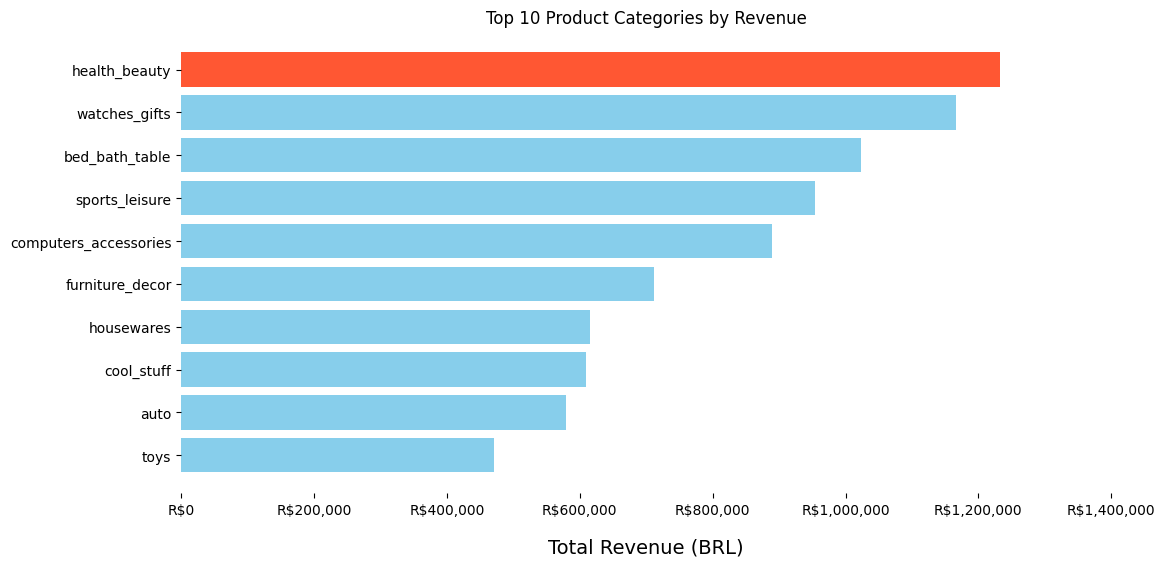

In [58]:
# Visualisasi top 10 kategori produk berdasarkan Revenue
top10_categories_by_revenue = product_summary.sort_values(by='total_revenue', ascending=False).head(10)

revenue_color = ['#FF5733' if i == 0 else 'skyblue' for i in range(len(top10_categories_by_revenue))]

plt.figure(figsize=(12,6))
plt.box(False)
plt.barh(top10_categories_by_revenue['product_category_name_english'], top10_categories_by_revenue['total_revenue'], color=revenue_color)
plt.xlabel('Total Revenue (BRL)', fontsize=14, labelpad=15)
plt.title('Top 10 Product Categories by Revenue')
plt.gca().invert_yaxis()
plt.xticks(ticks=plt.xticks()[0], labels=[f'R${int(x):,}' for x in plt.xticks()[0]])
plt.show()

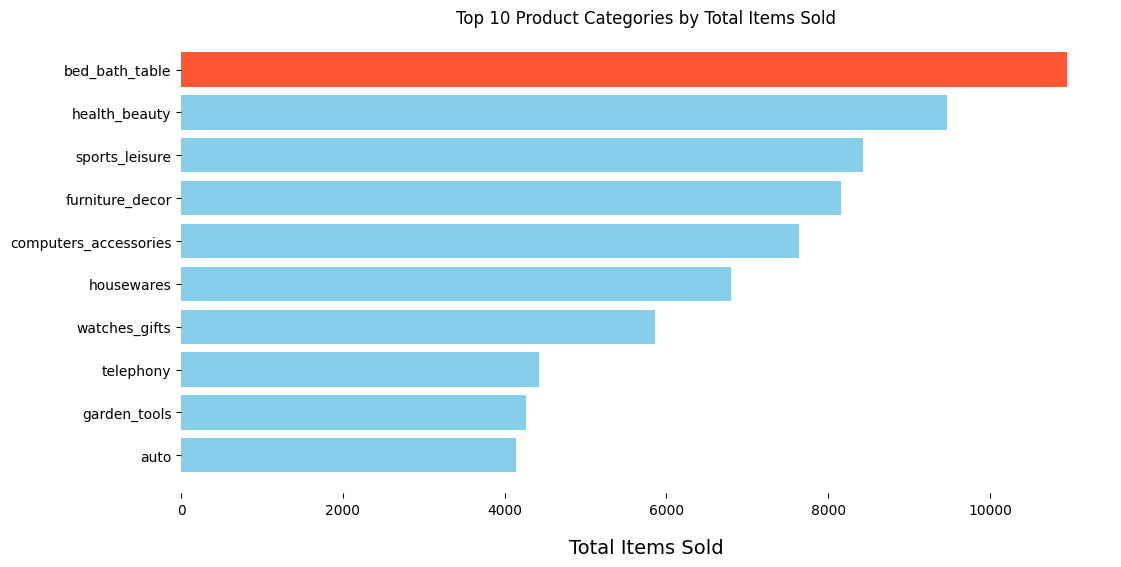

In [59]:
# Visualisasi top 10 kategori produk berdasarkan total item produk yang terjual
top10_categories_total_items = product_summary.sort_values(by='total_items_sold', ascending=False).head(10)

items_sold_color = ['#FF5733' if i == 0 else 'skyblue' for i in range(len(top10_categories_total_items))]

plt.figure(figsize=(12,6))
plt.box(False)
plt.barh(top10_categories_total_items['product_category_name_english'], top10_categories_total_items['total_items_sold'], color=items_sold_color)
plt.xlabel('Total Items Sold', fontsize=14, labelpad=15)
plt.title('Top 10 Product Categories by Total Items Sold')
plt.gca().invert_yaxis()
plt.show()

**Insight:**
- Kategori produk dengan revenue tertinggi adalah health_beauty, diikuti watches_gifts dan bed_bath_table
- Kategori health_beauty mendominasi dengan total revenue yang cukup signifikan dibandingkan kategori lainnya.
- Kategori bed_bath_table memiliki jumlah produk terjual tertinggi, menunjukkan produk-produk kebutuhan rumah tangga seperti perlengkapan kamar tidur dan kamar mandi sangat diminati.
- Health_beauty berada di posisi kedua, yang berarti selain menghasilkan revenue tinggi, produk ini juga laris manis.

### Pertanyaan 2: Bagaimana tren penjualan produk setiap bulan dan apakah ada pola musiman (seasonality)?

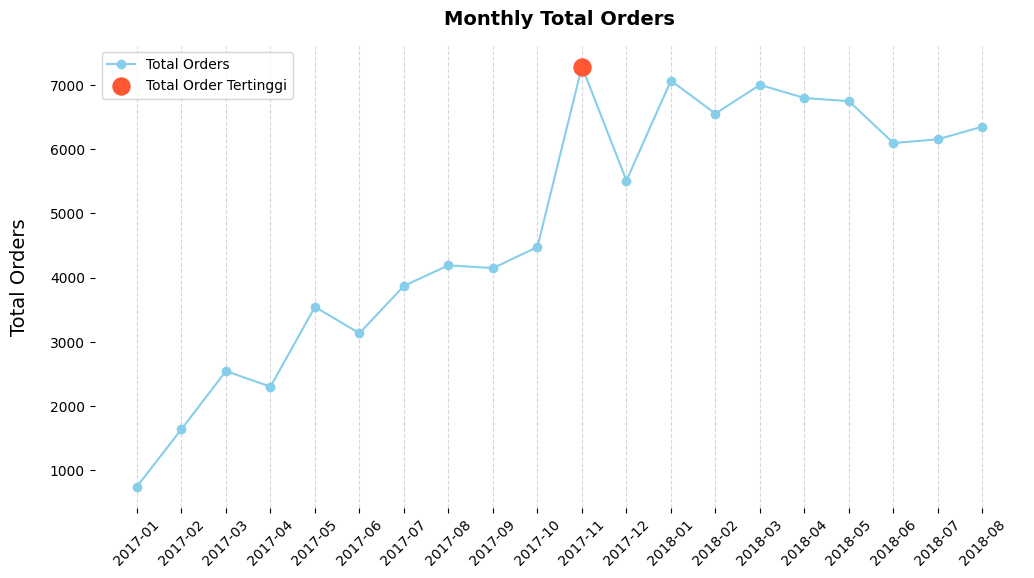

In [60]:
# # Filter data mulai Januari 2017
monthly_sales_filtered = monthly_sales[monthly_sales['year_month'] >= '2017-01']
max_sales_month = monthly_sales_filtered['total_orders'].idxmax()

plt.figure(figsize=(12,6))

# Plot Total Revenue
plt.plot(monthly_sales_filtered['year_month'].astype(str), 
         monthly_sales_filtered['total_orders'], 
         marker='o', color='skyblue', label='Total Orders')

# Highlight bulan dengan revenue tertinggi
plt.scatter(monthly_sales['year_month'].astype(str).iloc[max_sales_month], 
            monthly_sales['total_orders'].iloc[max_sales_month], 
            color='#FF5733', s=150, zorder=5, label='Total Order Tertinggi')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Total Orders', fontsize=14, labelpad=15)
plt.title('Monthly Total Orders', fontsize=14, weight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(loc=2)
plt.box(False)
plt.show()

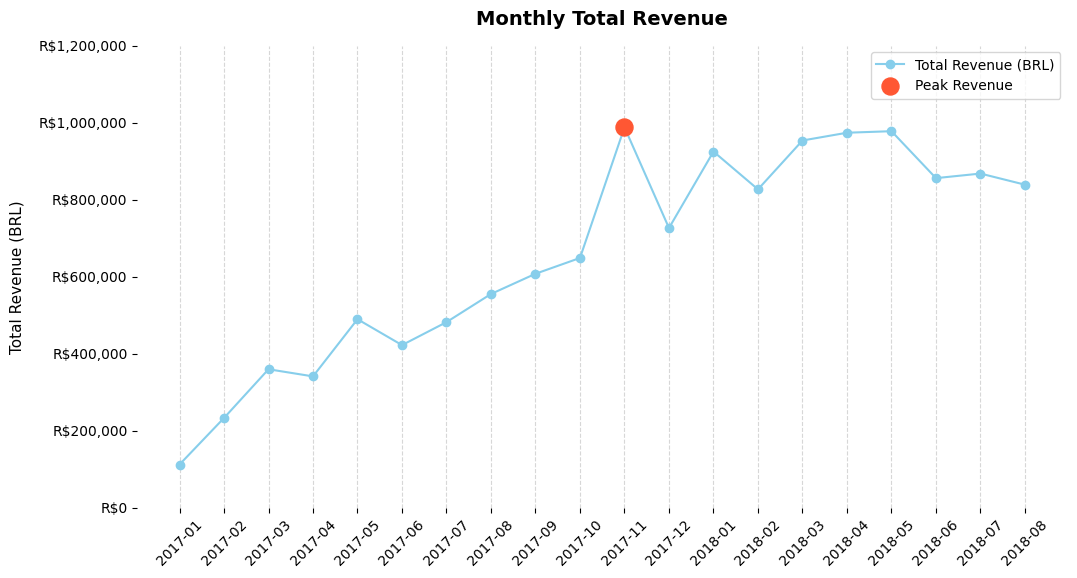

In [61]:
# Filter data mulai dari Januari 2017
monthly_sales_filtered = monthly_sales[monthly_sales['year_month'] >= '2017-01']

plt.figure(figsize=(12,6))

# Plot Total Revenue
plt.plot(monthly_sales_filtered['year_month'].astype(str), 
         monthly_sales_filtered['total_revenue'], 
         marker='o', color='skyblue', label='Total Revenue (BRL)')

# Highlight bulan dengan revenue tertinggi
max_revenue_month = monthly_sales_filtered['total_revenue'].idxmax()
plt.scatter(monthly_sales['year_month'].astype(str).iloc[max_revenue_month], 
            monthly_sales['total_revenue'].iloc[max_revenue_month], 
            color='#FF5733', s=150, zorder=5, label='Peak Revenue')

plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Total Revenue (BRL)', fontsize=11, labelpad=10)
plt.title('Monthly Total Revenue', fontsize=14, weight='bold', pad=15)
plt.yticks(ticks=plt.yticks()[0], labels=[f'R${int(y):,}' for y in plt.yticks()[0]])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend()
plt.box(False)
plt.show()

**Insight:**
- Tren revenue bulanan menunjukkan pertumbuhan signifikan sepanjang 2017, mencapai puncaknya di November 2017.
- Setelah puncak di November 2017., revenue mulai stabil di angka yang cukup tinggi sepanjang 2018.
- Lonjakan di akhir tahun (Q4) mengindikasikan adanya pengaruh event musiman seperti Hari Belanja Online Nasional atau periode liburan akhir tahun.
- Pola total orders sejalan dengan revenue, dengan puncak order di bulan November 2017.

### Pertanyaan 3: Dari kota mana saja pelanggan terbanyak berasal dan bagaimana distribusinya berdasarkan frekuensi pembelian?

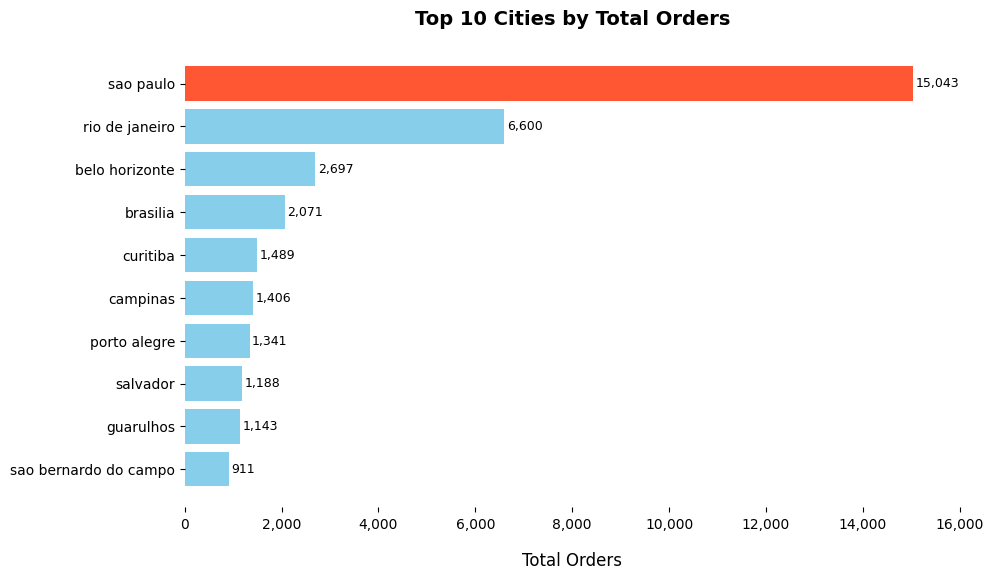

In [62]:
# Ambil top 10 kota
top5_cities = city_sales.sort_values(by='total_orders', ascending=False).head(10)

# Urutkan dari yang terbesar ke terkecil (biar kota dengan order terbanyak di atas)
top5_cities = top5_cities.sort_values(by='total_orders', ascending=True)

plt.figure(figsize=(10,6))

# Warna bar pertama paling tinggi diberi warna kontras
colors = ['#FF5733' if i == len(top5_cities) - 1 else 'skyblue' for i in range(len(top5_cities))]

bars = plt.barh(top5_cities['customer_city'], 
                top5_cities['total_orders'], 
                color=colors)

plt.xlabel('Total Orders', fontsize=12, labelpad=15)
plt.title('Top 10 Cities by Total Orders', fontsize=14, weight='bold', pad=15)
plt.box(False)
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x):,}' for x in plt.xticks()[0]], fontsize=10)

# Tambahkan label angka di ujung bar (diberi padding agar tidak dempet)
for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():,}', 
             va='center', ha='left', fontsize=9)

plt.grid(False)
plt.show()


**Insight:**
- São Paulo dan Rio de Janeiro menempati posisi teratas sebagai kota dengan jumlah order terbanyak. Kota-kota besar lainnya seperti Belo Horizonte, Brasília, dan Curitiba juga masuk 5 besar.
- Dominasi kota-kota besar menunjukkan bahwa aktivitas e-commerce Olist masih terpusat di kawasan metropolitan.

### Pertanyaan 4: Bagaimana tren pertumbuhan pelanggan baru setiap bulan?

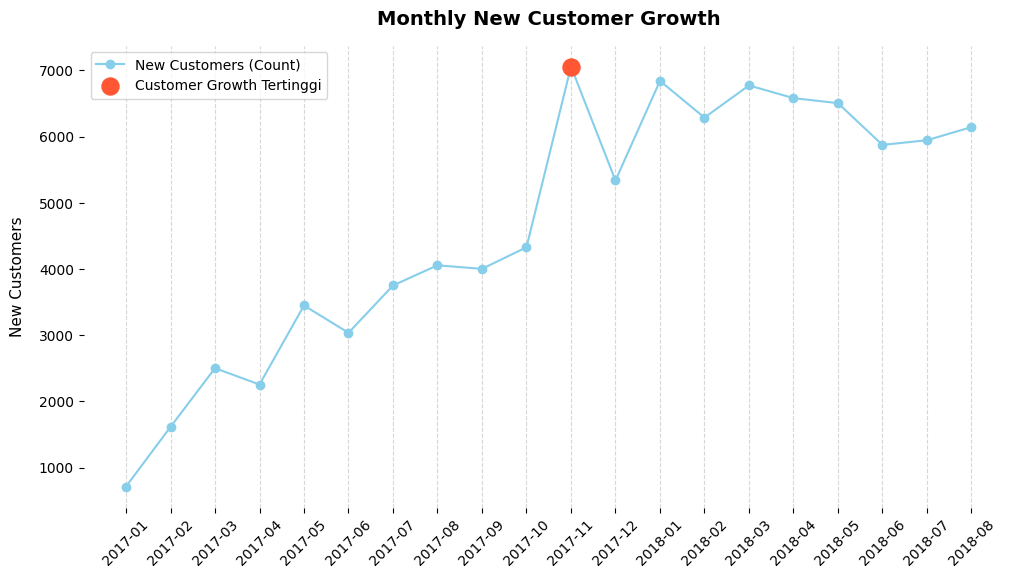

In [63]:
# Filter data mulai Januari 2017
new_customers_trend_filtered = new_customers_trend[new_customers_trend['year_month'] >= '2017-01']

plt.figure(figsize=(12,6))

# Cari bulan dengan pelanggan baru terbanyak setelah filter
max_new_customers_month = new_customers_trend_filtered['new_customers'].idxmax()


# Plot garis tren pelanggan baru
plt.plot(new_customers_trend_filtered['year_month'].astype(str), 
         new_customers_trend_filtered['new_customers'], 
         marker='o', color='skyblue', label='New Customers (Count)')

# Highlight bulan dengan revenue tertinggi
plt.scatter(new_customers_trend['year_month'].astype(str).iloc[max_new_customers_month], 
            new_customers_trend['new_customers'].iloc[max_new_customers_month], 
            color='#FF5733', s=150, zorder=5, label='Customer Growth Tertinggi')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('New Customers', fontsize=11, labelpad=10)
plt.title('Monthly New Customer Growth', fontsize=14, weight='bold', pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend()
plt.box(False)
plt.show()


**Insight:**
- Pertumbuhan pelanggan baru mengalami lonjakan tajam pada November 2017, selaras dengan lonjakan order dan revenue di bulan yang sama.
- Setelah November 2017, pertumbuhan pelanggan baru relatif stabil di angka yang cukup tinggi.

## Analisis Lanjutan : Clustering

Dalam analisis ini, teknik **clustering** digunakan untuk mengelompokkan kota berdasarkan jumlah total pesanan (**total_orders**). Klasifikasi dilakukan dalam tiga kategori utama:

- **High Order Volume** (Pesanan > 5000) → Kota dengan tingkat transaksi yang sangat tinggi.
- **Medium Order Volume** (Pesanan 1000 - 5000) → Kota dengan tingkat transaksi menengah.
- **Low Order Volume** (Pesanan < 1000) → Kota dengan tingkat transaksi rendah.

In [64]:
# Binning
max_orders = city_sales['total_orders'].max()
bins = [0, 1000, 5000, max_orders + 1]
labels = ['Low', 'Medium', 'High']

city_sales['order_category'] = pd.cut(city_sales['total_orders'], bins=bins, labels=labels, right=False)
city_sales.sort_values(by='total_orders', ascending=False).head(10)

,customer_city,customer_state,total_orders,unique_customers,order_category
3721,sao paulo,SP,15043,14527,High
3250,rio de janeiro,RJ,6600,6360,High
465,belo horizonte,MG,2697,2606,Medium
582,brasilia,DF,2071,2013,Medium
1179,curitiba,PR,1489,1434,Medium
732,campinas,SP,1406,1363,Medium
3050,porto alegre,RS,1341,1291,Medium
3343,salvador,BA,1188,1154,Medium
1576,guarulhos,SP,1143,1110,Medium
3541,sao bernardo do campo,SP,911,881,Low


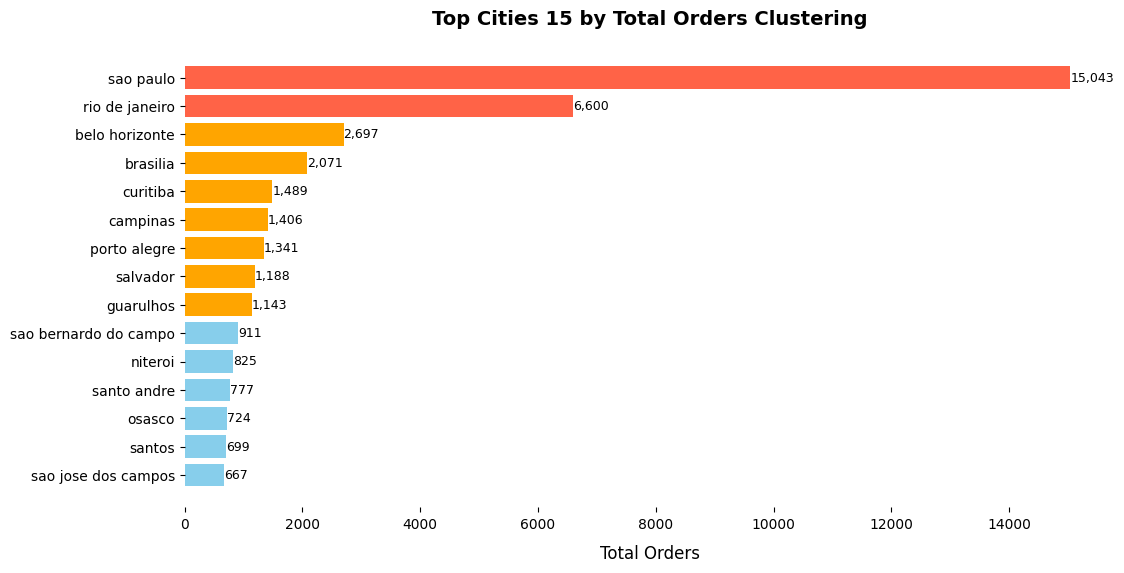

In [65]:
# Urutkan total_orders dari yang terbesar
city_sales_sorted = city_sales.sort_values(by='total_orders', ascending=False).head(15)

# Mapping warna
color_map = {
    'Low': 'skyblue',
    'Medium': 'orange',
    'High': 'tomato',
}

colors = city_sales_sorted['order_category'].map(color_map)

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.barh(city_sales_sorted['customer_city'], city_sales_sorted['total_orders'], color=colors)

plt.xlabel('Total Orders', fontsize=12, labelpad=10)
plt.title('Top Cities 15 by Total Orders Clustering', fontsize=14, weight='bold', pad=15)
plt.gca().invert_yaxis()

# Tambahkan label angka di ujung bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():,}', 
             va='center', ha='left', fontsize=9)

plt.box(False)
plt.show()

**Insight:**
- Kota kategori High (Total orders > 5000): São Paulo dan Rio de Janeiro.
- Kota kategori Medium (1001-5000 orders): Belo Horizonte, Brasília, Curitiba, dan beberapa kota besar lainnya.
- Mayoritas kota masuk kategori Low (≤ 1000 orders), menunjukkan bahwa penetrasi e-commerce di kota-kota kecil masih rendah.
- Pola ini memberi indikasi bahwa strategi ekspansi ke kota-kota kategori Low perlu dilakukan untuk mendorong pertumbuhan pesanan yang lebih merata di seluruh Brasil.
- Kota dengan kategori High perlu mendapat prioritas dalam pengelolaan inventory dan logistik karena kontribusi mereka sangat besar terhadap total order keseluruhan.

## Conclusion

- Produk-produk di kategori health_beauty dan bed_bath_table memiliki performa terbaik, baik dari sisi revenue maupun jumlah produk terjual. Ini menunjukkan bahwa produk kesehatan, kecantikan, dan kebutuhan rumah tangga sangat diminati oleh konsumen Olist.
- Terdapat pola musiman (seasonality) yang kuat, di mana akhir tahun (terutama November 2017) menjadi puncak aktivitas belanja. Hal ini kemungkinan besar dipengaruhi oleh event promosi skala nasional.
- Pertumbuhan pelanggan baru cukup stabil setelah puncak November 2017, menunjukkan bahwa kampanye akhir tahun tersebut tidak hanya menarik transaksi satu kali (one-time buyers), tetapi juga berhasil membentuk basis pelanggan baru yang cukup kuat.
- Distribusi order sangat terkonsentrasi di kota-kota besar seperti São Paulo dan Rio de Janeiro, sementara sebagian besar kota lainnya memiliki volume transaksi yang jauh lebih rendah. Ini mengindikasikan peluang besar untuk memperluas penetrasi pasar di kota-kota kecil.
- Manual grouping menunjukkan bahwa kota-kota High Order perlu difokuskan pada optimalisasi operasional dan logistik, sementara kota-kota Low Order bisa menjadi target utama kampanye marketing dan edukasi e-commerce.